In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 

gapminder_world = pd.read_csv('Downloads/gapminder_full.csv')
gapminder_world.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


1. How many countries does the dataset have?

In [2]:
num_countries = gapminder_world['country'].nunique()
print(f'Total number of countries: {num_countries}')

Total number of countries: 142


2. Create a pivot table that shows the average life expectancy for each continent and year. Index by 'continent', use 'year' as columns, and 'life_exp' as values.

In [3]:
average_life_expectancy_for_continent = gapminder_world.pivot_table(index = 'continent', columns = 'year', values = 'life_exp', aggfunc = 'mean')
average_life_expectancy_for_continent

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
continent,,,,,,,,,,,,
Africa,39.135500,41.266346,43.319442,45.334538,47.450942,49.580423,51.592865,53.344788,53.629577,53.598269,53.325231,54.806038
Americas,53.279840,55.960280,58.398760,60.410920,62.394920,64.391560,66.228840,68.090720,69.568360,71.150480,72.422040,73.608120
Asia,46.314394,49.318544,51.563223,54.663640,57.319269,59.610556,62.617939,64.851182,66.537212,68.020515,69.233879,70.728485
Europe,64.408500,66.703067,68.539233,69.737600,70.775033,71.937767,72.806400,73.642167,74.440100,75.505167,76.700600,77.648600
Oceania,69.255000,70.295000,71.085000,71.310000,71.910000,72.855000,74.290000,75.320000,76.945000,78.190000,79.740000,80.719500


3. Which countries had a GDP per capita higher than the 75th percentile in 2007?

In [4]:
gapminder_world_2007 = gapminder_world[gapminder_world['year'] == 2007]
gdp_cap_75_percentile = gapminder_world_2007['gdp_cap'].quantile(0.75)
high_gdp_countries = gapminder_world_2007[gapminder_world_2007['gdp_cap'] > gdp_cap_75_percentile]['country']
high_gdp_countries.tolist()

['Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Canada',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hong Kong, China',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Korea, Rep.',
 'Kuwait',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Portugal',
 'Puerto Rico',
 'Saudi Arabia',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Taiwan',
 'United Kingdom',
 'United States']

4. Categorize the 'life_exp' into 4 equally ranged bins from 'Low' to 'Very High'. Use cut to create these categorical life expectancy groups and add them as a new column 'Life_Exp_Range'.


In [5]:
gapminder_world['Life_Exp_Range'] = pd.cut(gapminder_world['life_exp'], bins = 4, labels = ['Low', 'Mediun', 'High', 'Very High'])
gapminder_world.head()

,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,Low
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,Low
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,Low
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,Low
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,Low


5. Identify the top 5 countries with the highest GDP per capita in 2007. Use a horizontal bar chart to display this data.

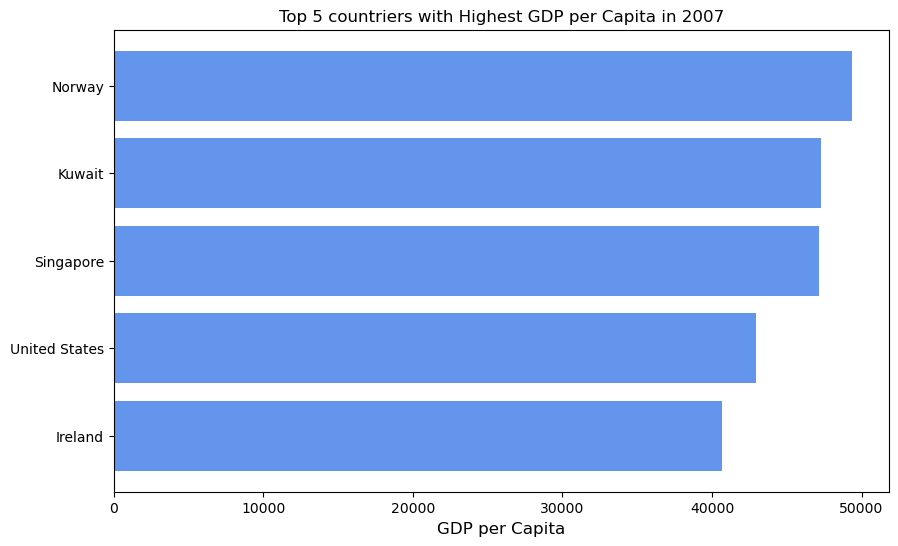

In [6]:
top_5_gdp_countries = gapminder_world_2007.nlargest(5, 'gdp_cap')

x = top_5_gdp_countries['country']
y = top_5_gdp_countries['gdp_cap']

plt.figure(figsize = (10, 6))
plt.barh(x, y, color = 'cornflowerblue')
plt.xlabel('GDP per Capita', fontsize = 12)
plt.title('Top 5 countriers with Highest GDP per Capita in 2007')
plt.gca().invert_yaxis()
plt.show()

6. Find all country names that start with "I" and end with "a" using regex.

In [7]:
regex = r'^I.*a$'

countries_with_Ia = gapminder_world[gapminder_world['country'].str.contains(regex, regex = True)]['country'].unique()

print(countries_with_Ia)

['India' 'Indonesia']


7. Create a boxplot using Seaborn to compare the distribution of GDP per capita for each continent in 2007.

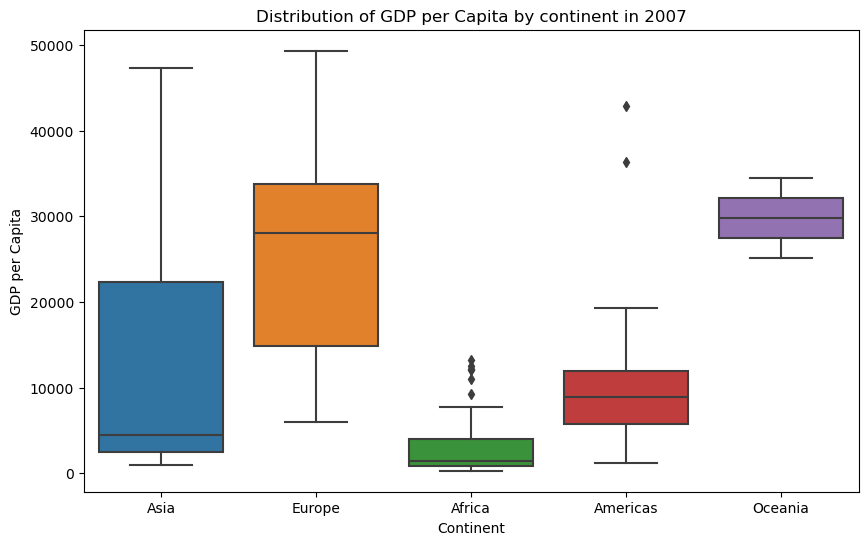

In [9]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'continent', y = 'gdp_cap', data = gapminder_world_2007)
plt.title('Distribution of GDP per Capita by continent in 2007')
plt.xlabel('Continent')
plt.ylabel('GDP per Capita')
plt.show()

8. Find all countries with a life expectancy of over 80 years in 2007. List these countries and their respective continents.

In [10]:
high_life_exp_countries = gapminder_world_2007[gapminder_world_2007['life_exp'] > 80]
high_life_exp_countries.loc[:, ['country', 'continent']]

,country,continent
71,Australia,Oceania
251,Canada,Americas
539,France,Europe
671,"Hong Kong, China",Asia
695,Iceland,Europe
767,Israel,Asia
779,Italy,Europe
803,Japan,Asia
1103,New Zealand,Oceania
1151,Norway,Europe


9. Convert the 'year' column to a datetime type and extract the decade. Create a new column 'Decade' that groups the years into decades (e.g., the 1950s, 1960s).

In [11]:
gapminder_world['year'] = pd.to_datetime(gapminder_world['year'], format = '%Y')

gapminder_world['Decade'] = (gapminder_world['year'].dt.year // 10) * 10
gapminder_world['Decade'] = gapminder_world['Decade'].astype(str) + 's'
gapminder_world.head()

,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range,Decade
0,Afghanistan,1952-01-01,8425333,Asia,28.801,779.445314,Low,1950s
1,Afghanistan,1957-01-01,9240934,Asia,30.332,820.853030,Low,1950s
2,Afghanistan,1962-01-01,10267083,Asia,31.997,853.100710,Low,1960s
3,Afghanistan,1967-01-01,11537966,Asia,34.020,836.197138,Low,1960s
4,Afghanistan,1972-01-01,13079460,Asia,36.088,739.981106,Low,1970s


10. Compute the correlation matrix between GDP per capita, life expectancy, and population for the dataset. Then, use Seaborn to visualize this correlation matrix as a heatmap.

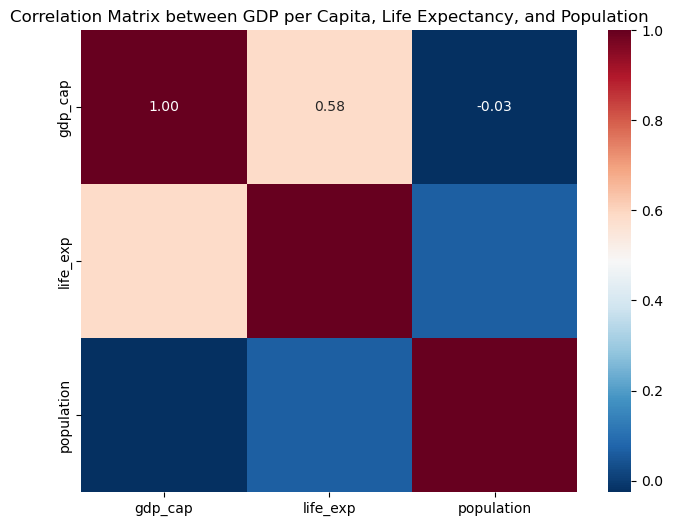

In [12]:
correlation_data = gapminder_world.loc[:,['gdp_cap', 'life_exp', 'population']]

correlation_matrix = correlation_data.corr()

plt.figure(figsize = (8, 6))
sns.heatmap(data = correlation_matrix, annot = True, cmap = 'RdBu_r', fmt = '.2f')
plt.title('Correlation Matrix between GDP per Capita, Life Expectancy, and Population')
plt.show()

11. How has the global average life expectancy changed from 1952 to 2007? Plot a line graph to visualize this trend.

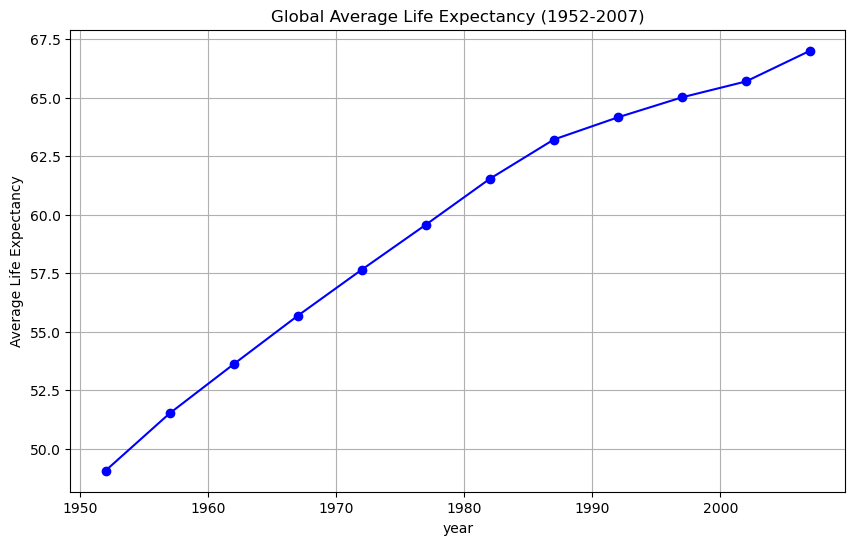

In [13]:
global_avg_life_exp = gapminder_world.groupby('year')['life_exp'].mean()
x = global_avg_life_exp.index
y = global_avg_life_exp.values

plt.figure(figsize = (10, 6))
plt.plot(x, y, marker = 'o', linestyle = '-', color = 'b')
plt.title('Global Average Life Expectancy (1952-2007)')
plt.xlabel('year')
plt.ylabel('Average Life Expectancy')
plt.grid(True)
plt.show()

12. For the year 2007, analyze the relationship between life expectancy and GDP per capita.

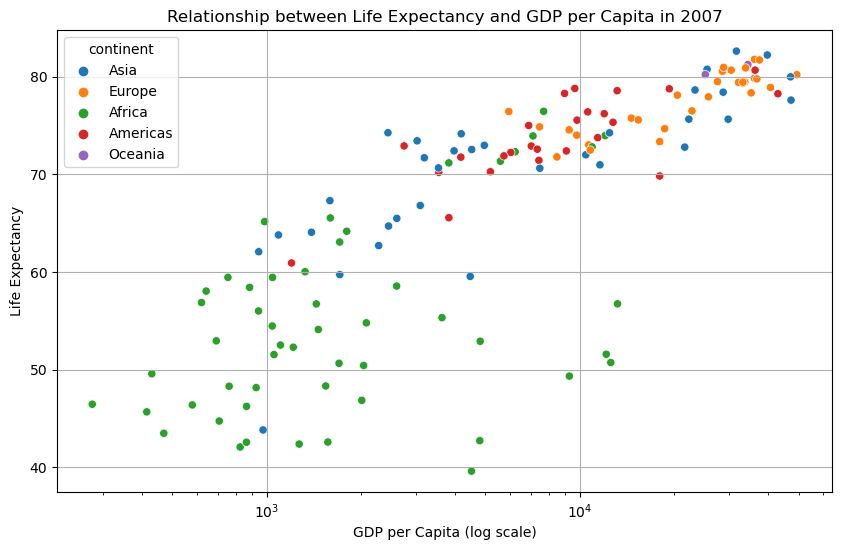

In [27]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'gdp_cap', y = 'life_exp', data = gapminder_world_2007, hue = 'continent')
plt.title('Relationship between Life Expectancy and GDP per Capita in 2007')
plt.xscale('log')
plt.xlabel('GDP per Capita (log scale)')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

13. Compare the average GDP per capita for each continent in the year 2007. Use a bar chart for this comparison.

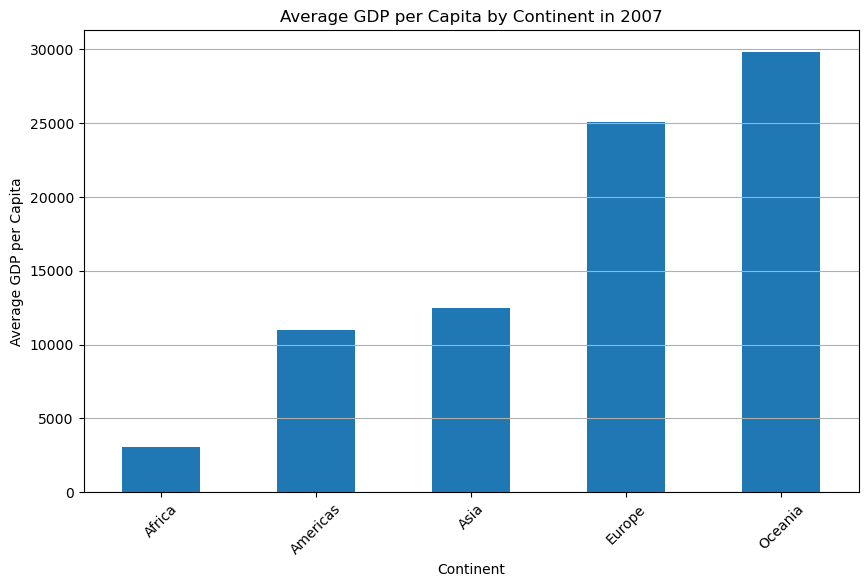

In [30]:
avg_gdp_per_continent = gapminder_world_2007.groupby('continent')['gdp_cap'].mean()

plt.figure(figsize = (10, 6))
avg_gdp_per_continent.plot(kind = 'bar')
plt.title('Average GDP per Capita by Continent in 2007')
plt.xlabel('Continent')
plt.ylabel('Average GDP per Capita')
plt.xticks(rotation = 45)
plt.grid(axis = 'y')
plt.show()

14. Compare the life expectancy and GDP per capita of Afghanistan (a country known for its historical conflicts) and Switzerland (representing a peaceful and economically prosperous country) using the dataset provided.
Firstly, for the year 2007, use a bar chart to directly compare the life expectancy and GDP per capita between these two countries.
Then, create two separate line graphs to show the trends of these two metrics over all available years in the dataset for both countries.

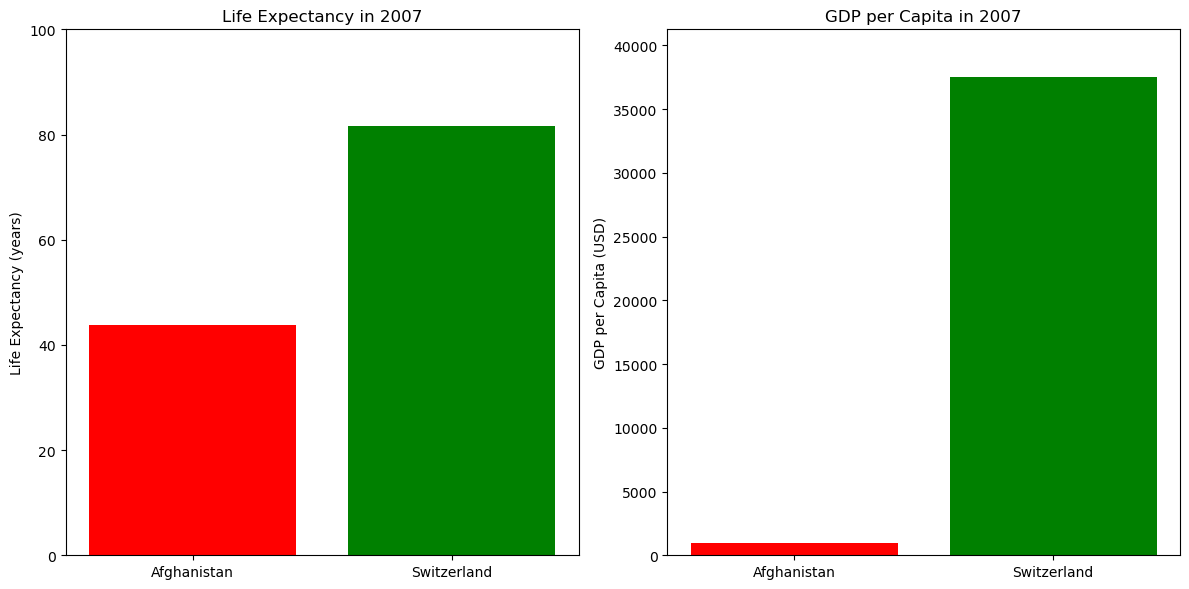

In [37]:
gapminder_world_2007_afg_swiss = gapminder_world_2007[gapminder_world_2007['country'].isin(['Afghanistan', 'Switzerland'])]

plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.bar(gapminder_world_2007_afg_swiss['country'], gapminder_world_2007_afg_swiss['life_exp'], color = ['red', 'green'])
plt.title('Life Expectancy in 2007')
plt.ylabel('Life Expectancy (years)')
plt.ylim(0, 100)

plt.subplot(1, 2, 2)
plt.bar(gapminder_world_2007_afg_swiss['country'], gapminder_world_2007_afg_swiss['gdp_cap'], color = ['red', 'green'])
plt.title('GDP per Capita in 2007')
plt.ylabel('GDP per Capita (USD)')
plt.ylim(0, max(gapminder_world_2007_afg_swiss['gdp_cap']) * 1.1)

plt.tight_layout()
plt.show()

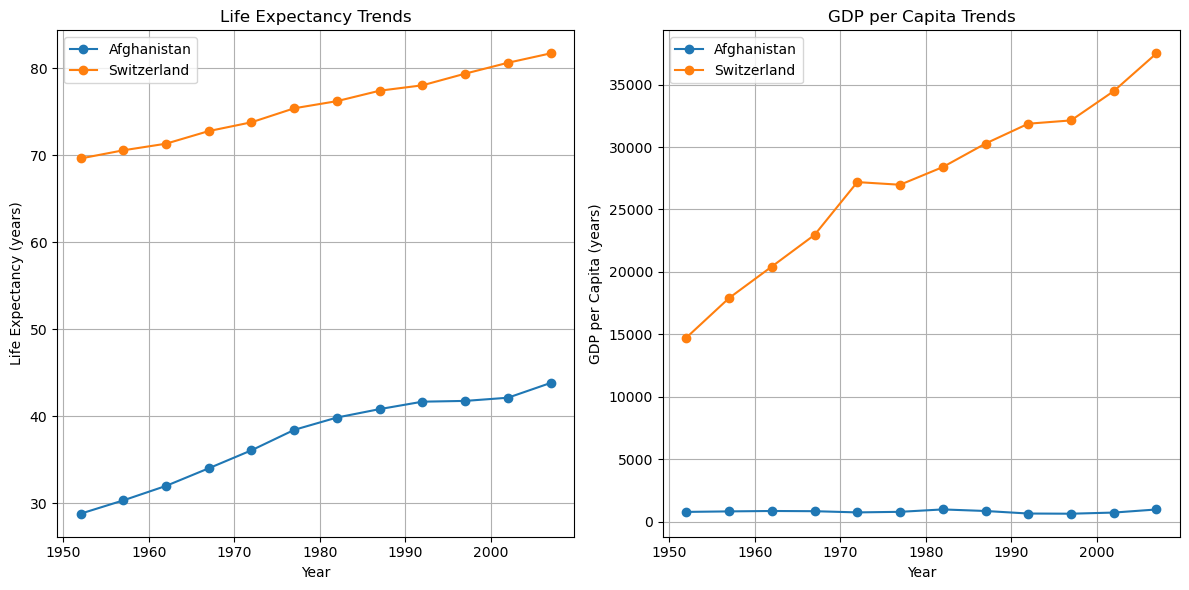

In [45]:
gapminder_world_afg_swiss = gapminder_world[gapminder_world['country'].isin(['Afghanistan', 'Switzerland'])]

plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
for country in ['Afghanistan', 'Switzerland']:
    country_data = gapminder_world_afg_swiss[gapminder_world_afg_swiss['country'] == country]
    plt.plot(country_data['year'], country_data['life_exp'], marker = 'o', label = country)
plt.title('Life Expectancy Trends')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for country in ['Afghanistan', 'Switzerland']:
    country_data = gapminder_world_afg_swiss[gapminder_world_afg_swiss['country'] == country]
    plt.plot(country_data['year'], country_data['gdp_cap'], marker = 'o', label = country)
plt.title('GDP per Capita Trends')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (years)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()